<a href="https://colab.research.google.com/github/gomlfx/apiaryfund/blob/master/fbprophet_H_high_low.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [2]:
#for the high prediction
df = pd.read_csv('EURUSD_H1_197101040000_202009210500.csv', sep='\t')
df['<DATETIME>'] = df['<DATE>'] + " " + df['<TIME>']
pd_df2 = pd.DataFrame(data = df.tail(5760))
pd_df2.rename(columns={"<DATETIME>":"ds","<HIGH>":"y"}, inplace=True)
df = pd_df2
df['ds'] = pd.to_datetime(df['ds'])
#m = Prophet().fit(df)
m = Prophet(daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True).fit(df) 
future = m.make_future_dataframe(periods=1, freq='H')
#making sure to drop weekends before running into m.predict
future = future[future['ds'].dt.dayofweek < 5]
fcst_h = m.predict(future)
fcst_h[['ds','yhat']].tail(1)

,ds,yhat
5756,2020-09-21 02:00:00,1.188362
5757,2020-09-21 03:00:00,1.188663
5758,2020-09-21 04:00:00,1.188853
5759,2020-09-21 05:00:00,1.188899
5760,2020-09-21 06:00:00,1.188918


In [3]:
#for the low prediction
df = pd.read_csv('EURUSD_H1_197101040000_202009210500.csv', sep='\t')
df['<DATETIME>'] = df['<DATE>'] + " " + df['<TIME>']
pd_df2 = pd.DataFrame(data = df.tail(5760))
pd_df2.rename(columns={"<DATETIME>":"ds","<LOW>":"y"}, inplace=True)
df = pd_df2
df['ds'] = pd.to_datetime(df['ds'])
#m = Prophet().fit(df)
m = Prophet(daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True).fit(df) 
future = m.make_future_dataframe(periods=1, freq='H')
#making sure to drop weekends before running into m.predict
future = future[future['ds'].dt.dayofweek < 5]
fcst_l = m.predict(future)
fcst_l[['ds','yhat']].tail(1)

,ds,yhat
5756,2020-09-21 02:00:00,1.186874
5757,2020-09-21 03:00:00,1.187028
5758,2020-09-21 04:00:00,1.187249
5759,2020-09-21 05:00:00,1.187550
5760,2020-09-21 06:00:00,1.187837


(1.18, 1.19)

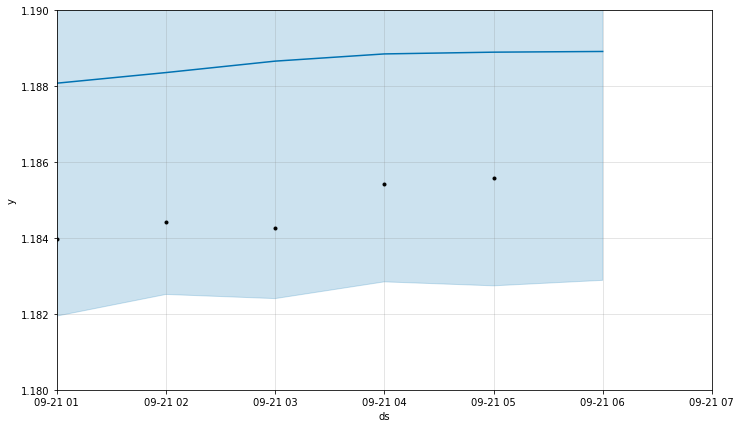

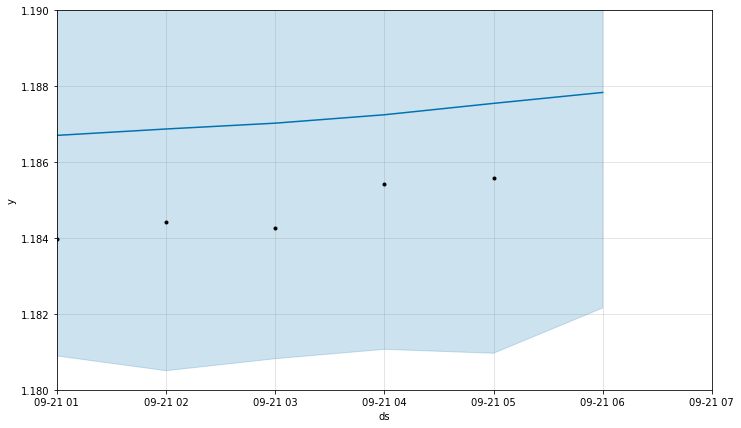

In [5]:
#next time combine on a single chart
pd.plotting.register_matplotlib_converters()
%matplotlib inline
fig = m.plot(fcst_h)
plt.xlim('2020-09-21 01:00:00','2020-09-21 7:00:00')
plt.ylim(1.18,1.19)

fig = m.plot(fcst_l)
plt.xlim('2020-09-21 01:00:00','2020-09-21 7:00:00')
plt.ylim(1.18,1.19)